#Задача регрессии (деревья решений)

Загрузка данных

In [1]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving diamonds.csv to diamonds.csv
User uploaded file "diamonds.csv" with length 35572 bytes


Импорт необходимых модулей

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Разведочный анализ датасета и визуализация данных

Считывание данных в датафрейм, информация о нем и просмотр его верхней части

In [3]:
df = pd.read_csv('diamonds.csv', sep=",", encoding='utf_8')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1078 non-null   float64
 1   depth   1078 non-null   float64
 2   table   1078 non-null   float64
 3   price   1078 non-null   int64  
 4   x       1078 non-null   float64
 5   y       1078 non-null   float64
 6   z       1078 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 59.1 KB


,carat,depth,table,price,x,y,z
0,0.53,61.2,56.0,1655,5.22,5.25,3.20
1,0.30,62.2,57.0,411,4.27,4.28,2.66
2,0.70,61.2,56.0,4000,5.72,5.75,3.51
3,0.54,62.6,58.0,1042,5.16,5.22,3.25
4,1.01,61.2,57.5,7277,6.43,6.45,3.94
5,1.00,62.9,55.0,6871,6.40,6.36,4.01
6,0.41,61.8,55.0,1153,4.80,4.75,2.95
7,0.73,62.1,58.0,2395,5.75,5.81,3.59
8,0.30,61.8,55.0,813,4.33,4.35,2.68
9,1.90,67.1,64.0,8576,7.57,7.52,5.06


Просмотр нижней части датафрейма

In [4]:
df.tail(n=10)

,carat,depth,table,price,x,y,z
1068,1.07,62.4,59.0,5498,6.53,6.46,4.05
1069,1.27,61.7,56.0,11002,7.03,6.90,4.30
1070,2.12,62.1,56.0,14503,8.17,8.25,5.10
1071,0.70,62.8,57.0,2553,5.66,5.68,3.56
1072,0.30,61.5,56.0,911,4.37,4.31,2.67
1073,1.13,59.4,62.0,3967,6.78,6.83,4.04
1074,0.30,63.4,56.0,614,4.26,4.29,2.71
1075,0.30,63.1,57.0,552,4.27,4.29,2.70
1076,1.01,67.1,59.0,2942,6.27,6.19,4.18
1077,1.04,60.1,58.0,3392,6.65,6.56,3.97


Вывод описательной статистики по датасету

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,0.786911,61.732746,57.510668,3770.916512,5.721447,5.722904,3.532727
std,0.444856,1.374132,2.247836,3617.987090,1.073285,1.065218,0.668290
min,0.230000,55.000000,52.000000,357.000000,3.880000,3.890000,2.360000
25%,0.400000,61.000000,56.000000,966.000000,4.740000,4.740000,2.930000
50%,0.710000,61.800000,57.000000,2466.000000,5.710000,5.740000,3.530000
75%,1.030000,62.400000,59.000000,5272.750000,6.520000,6.510000,4.020000
max,2.580000,68.000000,66.000000,18766.000000,8.710000,8.660000,5.570000


Парные диаграммы

<Figure size 1350x1350 with 0 Axes>

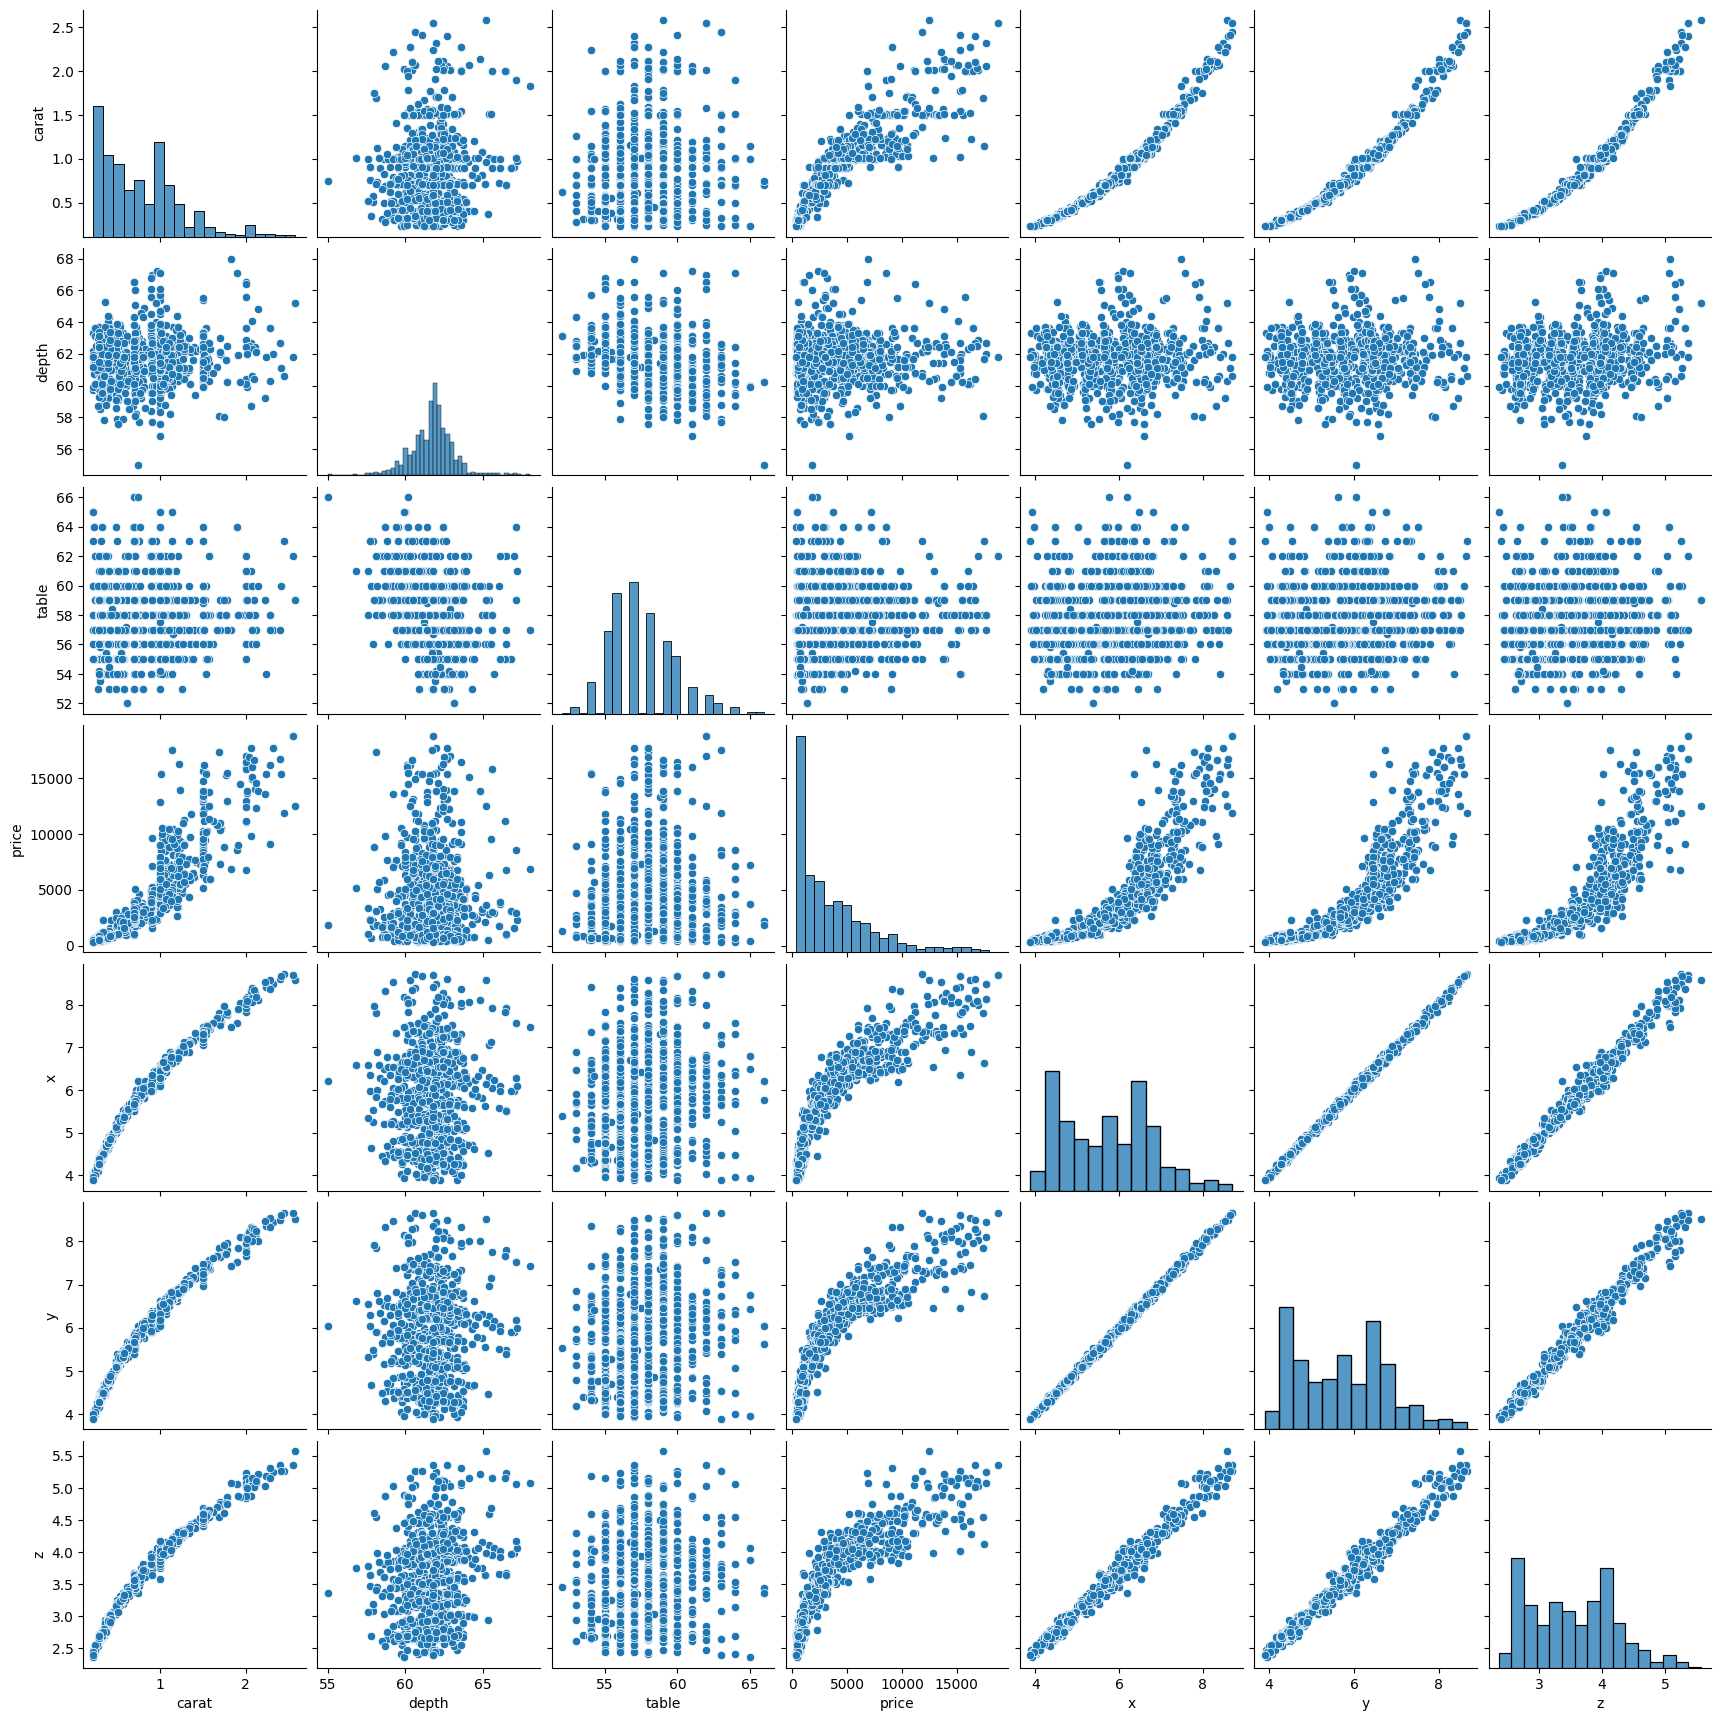

In [6]:
plt.figure(figsize=(15,15), dpi=90)
sns.pairplot(df, kind="scatter")

Корреляционная матрица

In [7]:
df.corr(method='pearson')


,carat,depth,table,price,x,y,z
carat,1.000000,0.098347,0.196237,0.908956,0.977541,0.976262,0.978113
depth,0.098347,1.000000,-0.278756,0.027811,0.036476,0.032294,0.158280
table,0.196237,-0.278756,1.000000,0.150988,0.198708,0.195293,0.162084
price,0.908956,0.027811,0.150988,1.000000,0.877117,0.878059,0.870141
x,0.977541,0.036476,0.198708,0.877117,1.000000,0.998870,0.991919
y,0.976262,0.032294,0.195293,0.878059,0.998870,1.000000,0.991360
z,0.978113,0.158280,0.162084,0.870141,0.991919,0.991360,1.000000


Диаграмма корреляции

<Axes: >

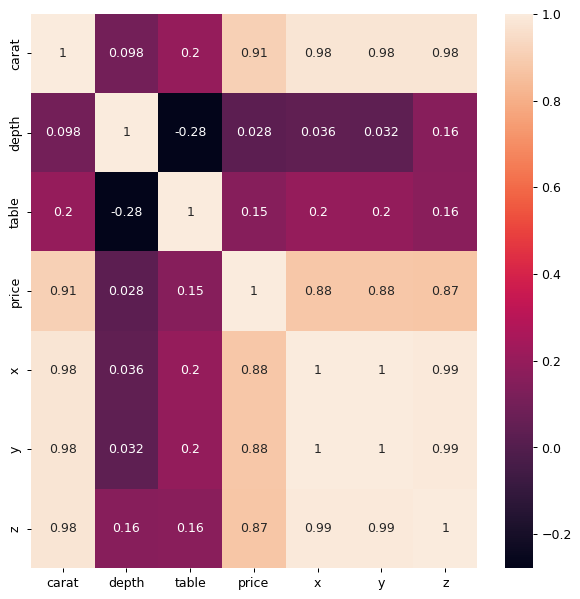

In [8]:
plt.figure(figsize=(8,8), dpi=90)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

#Деревья решений



![Дерево решений](https://studref.com/im/13/5014/398643-20.jpg)

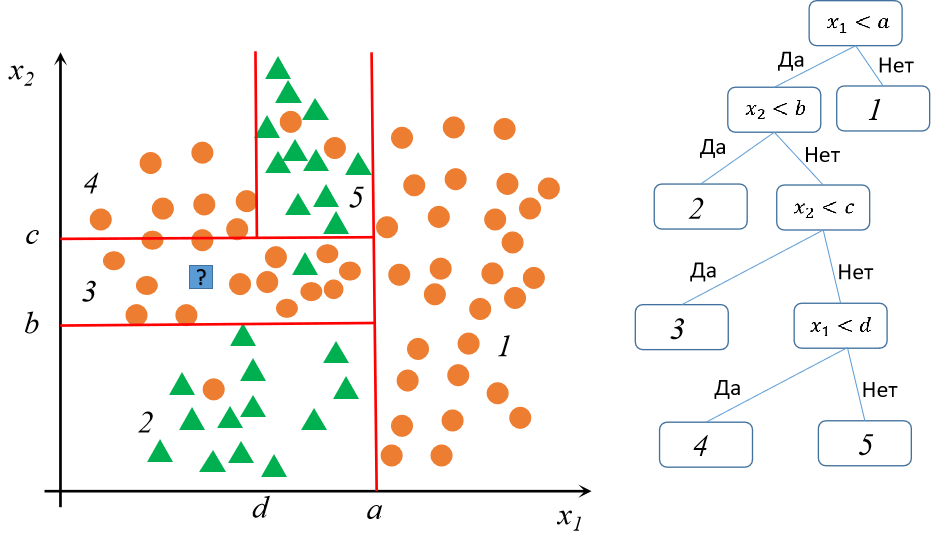

In [9]:
y = df['price']

y=y.values



In [10]:
X = df.drop(['price'], axis=1)
print(X.shape)
X.head(20)

(1078, 6)


,carat,depth,table,x,y,z
0,0.53,61.2,56.0,5.22,5.25,3.20
1,0.30,62.2,57.0,4.27,4.28,2.66
2,0.70,61.2,56.0,5.72,5.75,3.51
3,0.54,62.6,58.0,5.16,5.22,3.25
4,1.01,61.2,57.5,6.43,6.45,3.94
5,1.00,62.9,55.0,6.40,6.36,4.01
6,0.41,61.8,55.0,4.80,4.75,2.95
7,0.73,62.1,58.0,5.75,5.81,3.59
8,0.30,61.8,55.0,4.33,4.35,2.68
9,1.90,67.1,64.0,7.57,7.52,5.06


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Построение модели деревьев решений и предсказание с ее помощью

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model=DecisionTreeRegressor(random_state=42,max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
for i in range (len(y_pred)): print("i=", i," | y_pred=", y_pred[i]," | y_test=", y_test[i], " | y_pred - y_test=", y_pred[i] - y_test[i])


i= 0  | y_pred= 1006.1538461538462  | y_test= 849  | y_pred - y_test= 157.1538461538462
i= 1  | y_pred= 6007.022222222222  | y_test= 4564  | y_pred - y_test= 1443.022222222222
i= 2  | y_pred= 6007.022222222222  | y_test= 12865  | y_pred - y_test= -6857.977777777778
i= 3  | y_pred= 4708.866666666667  | y_test= 7964  | y_pred - y_test= -3255.133333333333
i= 4  | y_pred= 4062.2258064516127  | y_test= 4150  | y_pred - y_test= -87.7741935483873
i= 5  | y_pred= 6007.022222222222  | y_test= 5476  | y_pred - y_test= 531.0222222222219
i= 6  | y_pred= 1006.1538461538462  | y_test= 999  | y_pred - y_test= 7.153846153846189
i= 7  | y_pred= 4062.2258064516127  | y_test= 7131  | y_pred - y_test= -3068.7741935483873
i= 8  | y_pred= 582.3488372093024  | y_test= 538  | y_pred - y_test= 44.34883720930236
i= 9  | y_pred= 4708.866666666667  | y_test= 5279  | y_pred - y_test= -570.1333333333332
i= 10  | y_pred= 4062.2258064516127  | y_test= 3519  | y_pred - y_test= 543.2258064516127
i= 11  | y_pred= 10812.

Оценим качество предсказания модели деревьев решений

In [13]:
print ('RMSE=', np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE= 1846.3172081200255


**Ансамблевые методы. RandomForest - случаный лес**

В 1906 году известный британский ученый Френсис Гальтон попал на сельскую ярмарку, на которой в качестве развлечения посетителям предлагалось на глаз оценить вес выставленного на всеобщее обозрение быка и написать эту цифру на специальном билете. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далеких от скотоводческих дел. Собрав после этой ярмарки все билеты для анализа, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю.

![RandomForest](https://i0.wp.com/cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)

Построение модели случаного леса и предсказание с ее помощью

In [14]:
from sklearn.ensemble import RandomForestRegressor
model1 =  RandomForestRegressor(n_estimators=10 ,
                               oob_score=True,
                               random_state=1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


for i in range (len(y_pred)): print("i=", i," | y_pred=", y_pred[i]," | y_test=", y_test[i], " | y_pred - y_test=", y_pred[i] - y_test[i])

i= 0  | y_pred= 989.4  | y_test= 849  | y_pred - y_test= 140.39999999999998
i= 1  | y_pred= 6322.1  | y_test= 4564  | y_pred - y_test= 1758.1000000000004
i= 2  | y_pred= 5757.2  | y_test= 12865  | y_pred - y_test= -7107.8
i= 3  | y_pred= 4331.5  | y_test= 7964  | y_pred - y_test= -3632.5
i= 4  | y_pred= 4237.1  | y_test= 4150  | y_pred - y_test= 87.10000000000036
i= 5  | y_pred= 6144.1  | y_test= 5476  | y_pred - y_test= 668.1000000000004
i= 6  | y_pred= 1202.3  | y_test= 999  | y_pred - y_test= 203.29999999999995
i= 7  | y_pred= 4456.7  | y_test= 7131  | y_pred - y_test= -2674.3
i= 8  | y_pred= 511.8  | y_test= 538  | y_pred - y_test= -26.19999999999999
i= 9  | y_pred= 5266.2  | y_test= 5279  | y_pred - y_test= -12.800000000000182
i= 10  | y_pred= 3867.4  | y_test= 3519  | y_pred - y_test= 348.4000000000001
i= 11  | y_pred= 12710.5  | y_test= 12872  | y_pred - y_test= -161.5
i= 12  | y_pred= 733.8  | y_test= 516  | y_pred - y_test= 217.79999999999995
i= 13  | y_pred= 741.6  | y_test= 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Оценка качества предсказания модели RF



In [15]:
print ('RMSE=', np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE= 1596.5529528777279


**Градиентный бустинг**

Общая идея алгоритмов бустинга - последовательно применять предикторы так, чтобы каждая последующая модель минимизировала ошибку предыдущей.

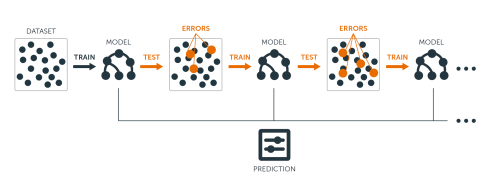

Построение модели XGBoost

In [16]:
import xgboost
model = xgboost.XGBRegressor(learning_rate=0.07, max_depth=5)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Предсказание с помощью XGBoost

In [17]:
y_pred = model.predict (X_test)
for i in range (len(y_pred)): print("i=", i," | y_pred=", y_pred[i]," | y_test=", y_test[i], " | y_pred - y_test=", y_pred[i] - y_test[i])


i= 0  | y_pred= 1082.774  | y_test= 849  | y_pred - y_test= 233.7740478515625
i= 1  | y_pred= 5985.379  | y_test= 4564  | y_pred - y_test= 1421.37890625
i= 2  | y_pred= 5534.2104  | y_test= 12865  | y_pred - y_test= -7330.78955078125
i= 3  | y_pred= 4533.5483  | y_test= 7964  | y_pred - y_test= -3430.45166015625
i= 4  | y_pred= 4059.3523  | y_test= 4150  | y_pred - y_test= -90.647705078125
i= 5  | y_pred= 7307.238  | y_test= 5476  | y_pred - y_test= 1831.23779296875
i= 6  | y_pred= 1028.8608  | y_test= 999  | y_pred - y_test= 29.86083984375
i= 7  | y_pred= 3921.2068  | y_test= 7131  | y_pred - y_test= -3209.793212890625
i= 8  | y_pred= 632.75195  | y_test= 538  | y_pred - y_test= 94.751953125
i= 9  | y_pred= 5461.3125  | y_test= 5279  | y_pred - y_test= 182.3125
i= 10  | y_pred= 3991.505  | y_test= 3519  | y_pred - y_test= 472.5048828125
i= 11  | y_pred= 11218.283  | y_test= 12872  | y_pred - y_test= -1653.716796875
i= 12  | y_pred= 802.84216  | y_test= 516  | y_pred - y_test= 286.8421

Оценка качества предсказания XGBoost

In [18]:
print ('RMSE=', np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE= 1667.5098137148857


Построение модели CatBoost и предсказание с ее помощью

In [19]:
!pip install catboost
from catboost import CatBoostRegressor

model2 = CatBoostRegressor(iterations=346, learning_rate=0.05, depth=5)
# Fit model
model2.fit(X_train, y_train)
# Get predictions
y_pred = model2.predict(X_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00
0:	learn: 3506.7342962	total: 47.7ms	remaining: 16.5s
1:	learn: 3379.9062332	total: 49.3ms	remaining: 8.48s
2:	learn: 3256.8899636	total: 50.4ms	remaining: 5.76s
3:	learn: 3135.8092697	total: 51.7ms	remaining: 4.42s
4:	learn: 3021.9624076	total: 52.7ms	remaining: 3.6s
5:	learn: 2911.3641595	total: 53.9ms	remaining: 3.05s
6:	learn: 2807.3306093	total: 55ms	remaining: 2.67s
7:	learn: 2711.6499078	total: 56.1ms	remaining: 2.37s
8:	learn: 2622.3975304	total: 57.1ms	remaining: 2.14s
9:	learn: 2543.6296102	total: 58.2ms	remaining: 1.95s
10:	learn: 2464.1154921	total: 59.2ms	remaining: 1.8s
11:	learn: 2388.9543018	total: 60.4ms	remaining: 1.68s
12:	learn: 2316.9817058	total: 61.5ms	remaining: 1.57s
13:	learn: 2248.6982422	total: 62.6ms	remaining: 1.49s
14:	learn: 2185.7016138	total: 63.7ms	remaining: 1.4s
15:	learn: 2126.9615143	total: 64.6ms	remaining: 1.33s
16:	learn: 2069.9220834	total: 65.8ms	remaining: 1.27s


In [20]:
for i in range (len(y_pred)): print("i=", i," | y_pred=", y_pred[i]," | y_test=", y_test[i], " | y_pred - y_test=", y_pred[i] - y_test[i])


i= 0  | y_pred= 1205.6268470324476  | y_test= 849  | y_pred - y_test= 356.6268470324476
i= 1  | y_pred= 6149.086044355217  | y_test= 4564  | y_pred - y_test= 1585.0860443552174
i= 2  | y_pred= 5604.392955129467  | y_test= 12865  | y_pred - y_test= -7260.607044870533
i= 3  | y_pred= 5067.763686964172  | y_test= 7964  | y_pred - y_test= -2896.236313035828
i= 4  | y_pred= 4104.866017990353  | y_test= 4150  | y_pred - y_test= -45.1339820096473
i= 5  | y_pred= 6790.307577714691  | y_test= 5476  | y_pred - y_test= 1314.3075777146914
i= 6  | y_pred= 1069.0521243482194  | y_test= 999  | y_pred - y_test= 70.05212434821942
i= 7  | y_pred= 3618.197228671869  | y_test= 7131  | y_pred - y_test= -3512.802771328131
i= 8  | y_pred= 703.8013376693953  | y_test= 538  | y_pred - y_test= 165.80133766939525
i= 9  | y_pred= 5224.545517897841  | y_test= 5279  | y_pred - y_test= -54.45448210215909
i= 10  | y_pred= 3747.4346401485227  | y_test= 3519  | y_pred - y_test= 228.4346401485227
i= 11  | y_pred= 11100.

Оценка качества модели CatBoost

In [21]:
print ('RMSE=', np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE= 1597.510730992348
